# Statistics made simple through simulation

_adapted from [this notebook](https://github.com/jcbozonier/PyData2015/blob/master/PyData%20Workshop.ipynb) by [Justin Bozonier](https://twitter.com/databozo)_

## The 5 Step Modelling Approach

1. Ask the question
2. Select the modelling approach
3. Formulate the model
4. Solve the model
5. Answer the question


## Monte Carlo Simulation

Pros
* General method that can give approximate solutions to any probability modelling problem. (Mathematical Modelling, Meerschaert)
* Intuitive models that are fairly straight-forward to grasp without much mathematical formalism.

Cons
* Solves via brute force and that can get very time intensive.
* The simulation itself introduces extra variation into your solution

To the last point while this is true, Meerschaert says:

"As a practical matter, there are many sources of error and variation in a modelling problem, and the additional variation produced by Monte Carlo simulation is not typically the most serious of these."

He goes on to say that sensitivity analysis is your friend.

We'll be using this term to be synonymous with Analytical Simulation. The core difference is a pure Monte Carlo simulation works in simplest terms with no higher level mathematical concepts. An analytical simulation may use probability distributions or other mathematical tooling as a shortcut.

## Enough theory

Easiest to explain with a simple example. Suppose you're in a room facing a large wall and large open window with a bowl full of marbles on a table behind you. 

How might you answer the question: "What percentage of that wall is the window taking up?"

Process
1. Count how many marbles are in the bowl.
2. Close your eyes and throw marbles at the wall in a purely random way.
3. Find the percentage of marbles that went through the window.

The answer you get from step 3 will approximate how much of the wall the window takes up.

Let's simulate this and see how it works.

In [ ]:
import math, random
import matplotlib.pyplot as plt

In [24]:
wall_width = 20
wall_height = 10

window_lower_left = (5, 2.5)
window_upper_right = (15, 7.5)

number_of_marbles = 1000

In [25]:
sample_widths = [random.random() * wall_width for i in range(number_of_marbles)]
sample_heights = [random.random() * wall_height for i in range(number_of_marbles)]

random_marbles_thrown = zip(sample_widths, sample_heights)

We pick an X and a Y to form a coordinate that we throw a marble at. We throw all of our marbles this way. Then we gather all of the marbles that hit the wall and didn't go through the window.

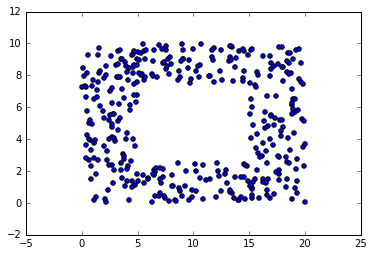

In [26]:
marbles_that_hit_the_wall = filter(lambda x: (x[0] < window_lower_left[0] or x[0] > window_upper_right[0]) or
                                             (x[1] < window_lower_left[1] or x[1] > window_upper_right[1]), 
                                             random_marbles_thrown)

plt.scatter(x=map(lambda x: x[0], marbles_that_hit_the_wall), y=map(lambda x: x[1], marbles_that_hit_the_wall))

Next we find the percentage of marbles that went through the window to find what percentage of the wall the window takes up.

In [18]:
len(marbles_that_hit_the_wall) / (1.0*number_of_marbles)

0.74952

In [19]:
1 - len(marbles_that_hit_the_wall) / (1.0*number_of_marbles)

0.25048000000000004

It's pretty straightforward to do this manually with math:

In [1]:
window_height = window_upper_right[1] - window_lower_left[1]
window_width = window_upper_right[0] - window_lower_left[0]

(window_height * window_width) / (1.0 * wall_height * wall_width)

NameError: name 'window_upper_right' is not defined